# Wstęp

Zaimportowanie potrzebnych bibliotek, ustawienie rozmiaru wyświetlanych obrazów, załadowanie obrazu, zamiana kolejności bajtów z BGR na RGB oraz wyświetlenie oryginalnego obrazu.

Źródło obrazu: [deviantart.com](https://www.deviantart.com/karl-smink/art/Black-Lotus-358013323)

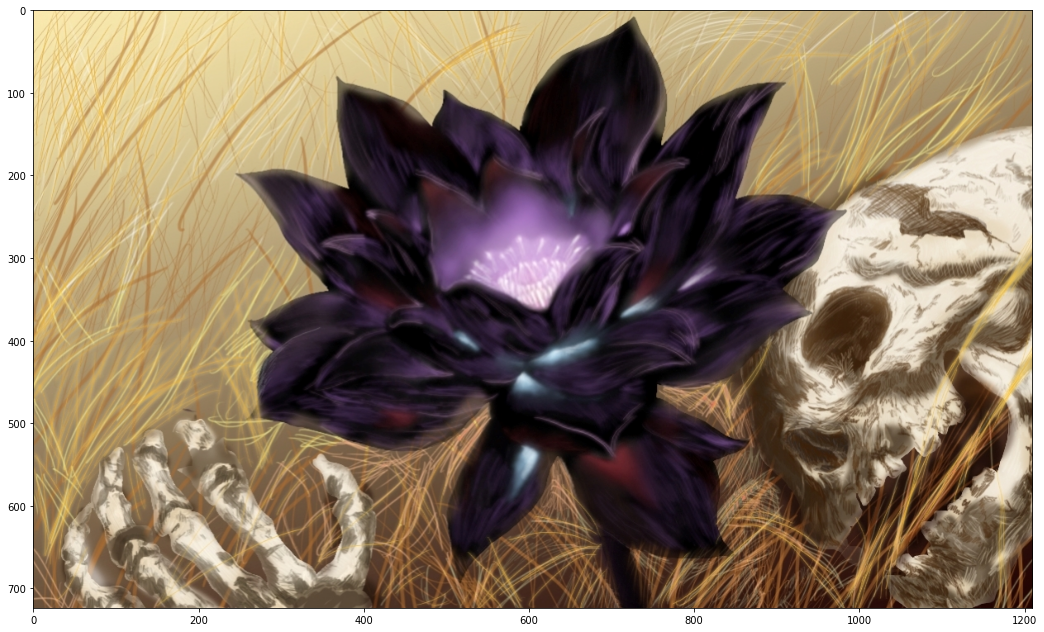

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (18, 11)
image = cv.imread("images/black_lotus.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)


# Zadanie 1

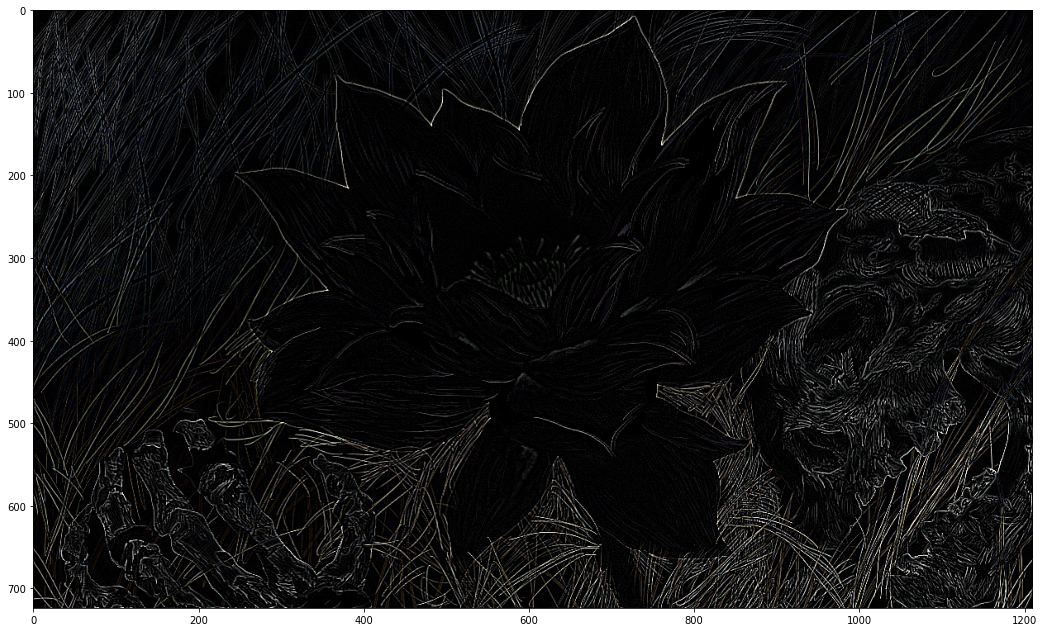

In [2]:
kernel = [
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
]
kernel = np.asarray(kernel)
filtered_image = cv.filter2D(image, -1, kernel=kernel)

plt.imshow(filtered_image)


# Zadanie 2

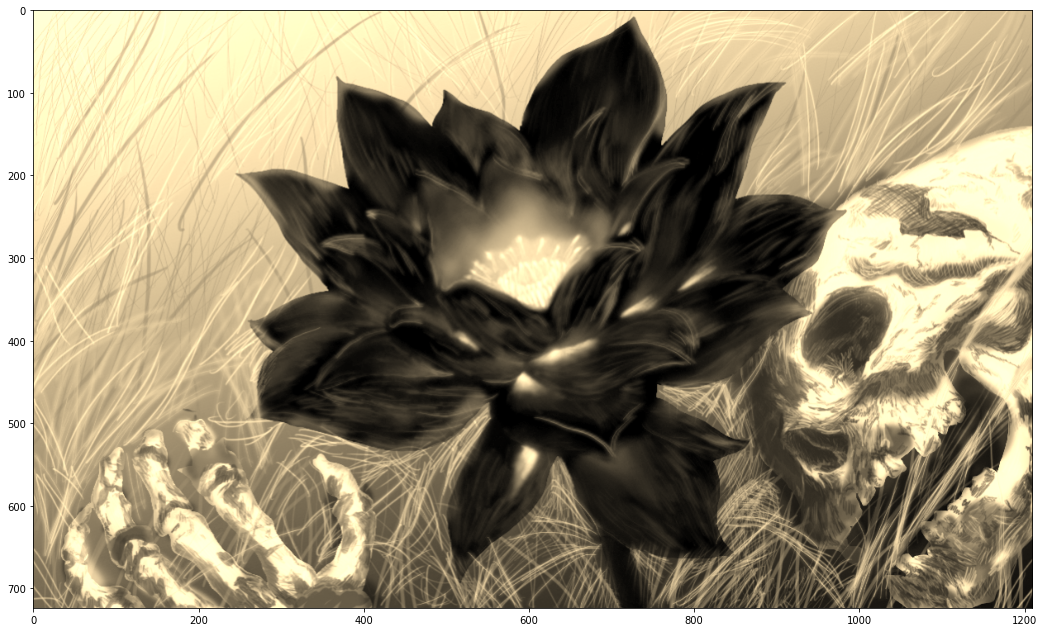

In [3]:
model = [
    [0.393, 0.769, 0.189],
    [0.349, 0.689, 0.168],
    [0.272, 0.534, 0.131]
]
model = np.asarray(model)


transformed_image = np.asarray(image, dtype=np.float32)
transformed_image = transformed_image / 255

for x in range(transformed_image.shape[0]):
    for y in range(transformed_image.shape[1]):
        transformed_image[x, y, :] = np.dot(model, transformed_image[x, y, :])

for id, value in np.ndenumerate(transformed_image):
    if (value > 1):
        transformed_image[id] = 1.0

plt.imshow(transformed_image)


# Zadanie 3

Text(0.5, 1.0, 'Element Cr')

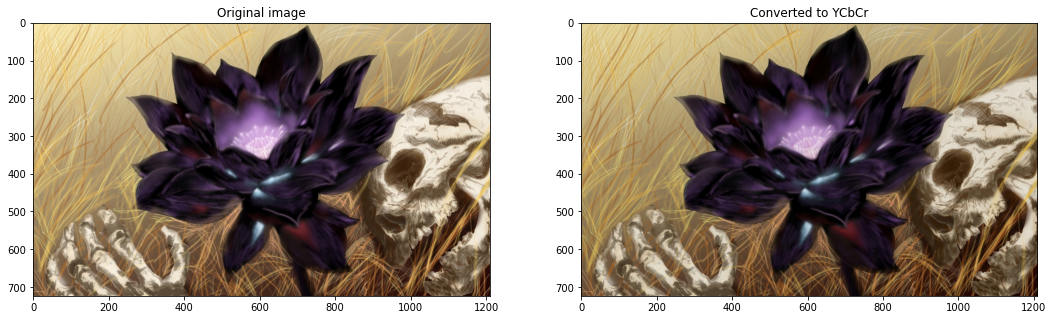

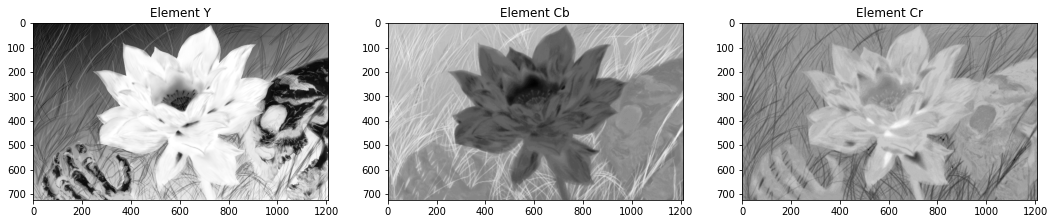

In [6]:
imageYCrCb = image.copy()

modelYCrCb = [
    [0.229,  0.587,  0.114],
    [0.500, -0.418, -0.082],
    [-0.168, -0.331,  0.500]
]
addArray = [0, 128, 128]
modelYCrCb = np.asarray(modelYCrCb)
addArray = np.asarray(addArray)

for x in range(imageYCrCb.shape[0]):
    for y in range(imageYCrCb.shape[1]):
        imageYCrCb[x, y, :] = addArray + \
            np.dot(modelYCrCb, imageYCrCb[x, y, :])

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[0].set_title('Original image')

ax[1].imshow(cv.cvtColor(imageYCrCb, cv.COLOR_YCrCb2RGB))
ax[1].set_title('Converted to YCbCr')

fig, ax = plt.subplots(1, 3)
ax[0].imshow(imageYCrCb[:, :, 0], cmap="Greys")
ax[0].set_title('Element Y')

ax[1].imshow(imageYCrCb[:, :, 2], cmap="Greys")
ax[1].set_title('Element Cb')

ax[2].imshow(imageYCrCb[:, :, 1], cmap="Greys")
ax[2].set_title('Element Cr')


# Zadanie 4

Text(0.5, 1.0, 'Downsampled and upsampled image')

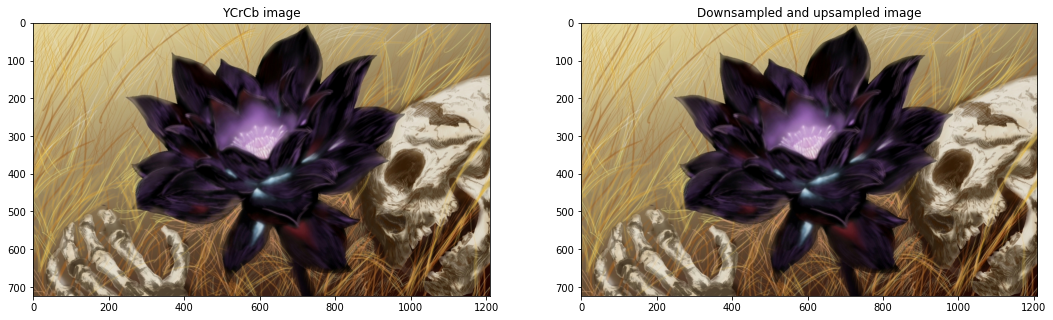

In [8]:
copy_imageYCrCb = imageYCrCb.copy()

old_x = copy_imageYCrCb.shape[0]
old_y = copy_imageYCrCb.shape[1]

new_x = int(old_x / 2)
new_y = int(old_y / 2)

matrix_Y = copy_imageYCrCb[:, :, 0]

# Empty arrays for downsampled
downsampled_Cr = np.empty((new_x, new_y), dtype=np.uint8)
downsampled_Cb = np.empty((new_x, new_y), dtype=np.uint8)

# Downsampling
for x, xx in zip(range(0, old_x, 2), range(new_x)):
    for y, yy in zip(range(0, old_y, 2), range(new_y)):
        downsampled_Cr[xx, yy] = imageYCrCb[x, y, 1]
        downsampled_Cb[xx, yy] = imageYCrCb[x, y, 2]

# Empty arrays for upsampling
upsampled_imageYCrCb = np.empty((old_x, old_y, 3), dtype=np.uint8)
upsampled_Cr = np.empty((old_x, old_y), dtype=np.uint8)
upsampled_Cb = np.empty((old_x, old_y), dtype=np.uint8)

# Upsampling
for x, xx in zip(range(0, old_x, 2), range(new_x)):
    for y, yy in zip(range(0, old_y, 2), range(new_y)):
        upsampled_Cr[x, y] = downsampled_Cr[xx, yy]
        upsampled_Cr[x, y + 1] = downsampled_Cr[xx, yy]

        upsampled_Cb[x, y] = downsampled_Cb[xx, yy]
        upsampled_Cb[x, y + 1] = downsampled_Cb[xx, yy]
    upsampled_Cr[x + 1, :] = upsampled_Cr[x, :]
    upsampled_Cb[x + 1, :] = upsampled_Cb[x, :]

upsampled_imageYCrCb[:, :, 0] = matrix_Y
upsampled_imageYCrCb[:, :, 1] = upsampled_Cr
upsampled_imageYCrCb[:, :, 2] = upsampled_Cb

upsampled_imageRGB = cv.cvtColor(upsampled_imageYCrCb, cv.COLOR_YCrCb2RGB)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv.cvtColor(imageYCrCb, cv.COLOR_YCrCb2RGB))
ax[0].set_title('YCrCb image')

ax[1].imshow(upsampled_imageRGB)
ax[1].set_title('Downsampled and upsampled image')


# Zadanie 5

In [12]:
image_pre_sampling = cv.cvtColor(imageYCrCb.copy(), cv.COLOR_YCrCb2RGB)
image_post_sampling = upsampled_imageRGB.copy()

MSE = 0.0

for id, value in np.ndenumerate(image_pre_sampling):
    x = int(image_pre_sampling[id]) - int(image_post_sampling[id])
    MSE += x ** 2

MSE = MSE / image_pre_sampling.size
print(f'MSE = {MSE}')


<class 'numpy.ndarray'> (724, 1210, 3)
2628120
MSE = 2.9336891009542945
